# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


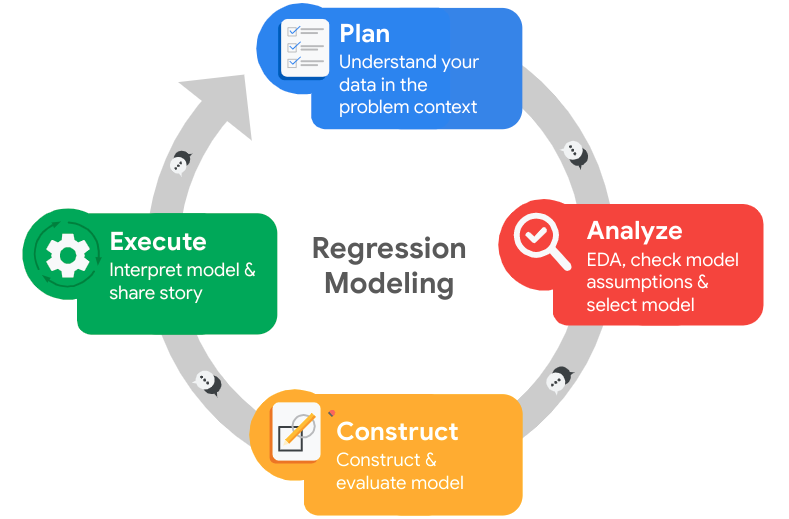

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




**My Response**
1. The stakeholders for this project are the executives, HR, and managers. They are the ones who will decide how the information discovered will be implemented into company policy. They are not as data knowledgable so the report to them must be business focused and not too much data jargon.

2. The problem trying to be solved is how to decrease the turnover rate at Salifort Motors. This problem may have a root cause that is uncovered in the data exploration or the data modeling. 

3. I will be looking for completeness of the data, such as how many missing values. I will be looking at the distribution of data points for each variable. Is the target value imbalanced? Is there enough variation in the variables to create a signal for the model to learn. Are there outliers that need to be removed to make sure there is no false conclusions drawn and that the model will generalize well.

4. I will likely use the resources from the Google Advanced Analytics course as well as sklearn, xgboost, seaborn, scipy, statsmodels, and matplotlib documentation.

5. I do not see any apparent ethical concerns, since gender, race, ethnicity, education, and other personal characteristics are not included.


## Resources
- https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
- https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot
- https://seaborn.pydata.org/examples/scatterplot_matrix.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
- https://datagy.io/sklearn-one-hot-encode/
- https://jamesrledoux.com/code/randomized_parameter_search
- https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/
- https://www.kaggle.com/code/dansbecker/shap-values

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [182]:
# Import data manipulation packages
import pandas as pd
import numpy as np

# import data viz packages
import matplotlib.pyplot as plt
import seaborn as sns

# import stats and modeling packages
import scipy as sp
from scipy.stats import uniform, truncnorm, randint, loguniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate, RepeatedStratifiedKFold, PredefinedSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# import explainability packages
from xgboost import plot_importance
import shap

import pickle
import warnings

warnings.filterwarnings('ignore')

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

**Dataset can be found at Kaggle:** [Capstone Project: Salifort Motor HR Dataset](https://www.kaggle.com/datasets/leviiiest/salifort-motor-hr-dataset)

In [183]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
sfmotors_df = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
sfmotors_df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [184]:
# Gather basic information about the data
sfmotors_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Basic Info Analysis:
There are no missing data points. This makes cleaning a little easier. There are two categorical variables that will need to be one hot encoded (Department, salary)

### Gather descriptive statistics about the data

In [185]:
# Gather descriptive statistics about the data
sfmotors_df.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Descriptive Statistic Analysis:

- There are **two binary variables**: Work_accident, promotion_last_5years
- There are **two continuous variables** that have a **range of 0 to 1.0**: satisfaction_level, last_evaluation
- There are **three discrete numerical variables**: number_project, average_monthly_hours, time_spend_company
- The **target variable (left) is binary** and based on the mean, is **imbalanced 76% with 0 and 24% with 1**.

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [186]:
# Display all column names
sfmotors_df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [187]:
# Rename columns using the lower() function
sfmotors_df.columns = [col.lower() for col in sfmotors_df.columns]

# fix the typo in average_montly_hours
sfmotors_df = sfmotors_df.rename(columns={'average_montly_hours':'average_monthly_hours'})


# Display all column names after the update
sfmotors_df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [188]:
# Check for missing values
sfmotors_df.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [189]:
# Check for duplicates
duplicate_count = sfmotors_df.duplicated().sum()
print(f'There are {duplicate_count} duplicates')
print(f'Which is {round(100*duplicate_count/sfmotors_df.shape[0])}% of the rows')



There are 3008 duplicates
Which is 20% of the rows


In [190]:
# Inspect some rows containing duplicates as needed
duplicate_rows = sfmotors_df[sfmotors_df.duplicated()]
duplicate_rows.head(10)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [191]:
# Drop duplicates and save resulting dataframe in a new variable as needed
no_dupes_df = sfmotors_df[~sfmotors_df.duplicated()]


# Display the shape of the new dataframe compared to the original
no_dupes_df.shape, sfmotors_df.shape


((11991, 10), (14999, 10))

### Check outliers

Check for outliers in the data.

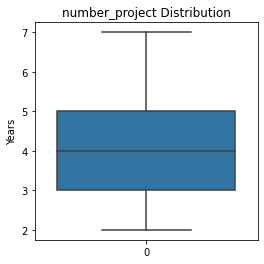

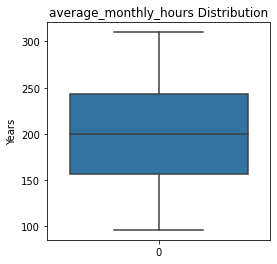

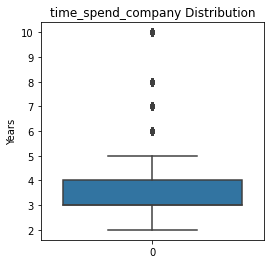

In [192]:
# Create a boxplot to visualize distribution of values and detect any outliers
discrete_cols = ['number_project', 'average_monthly_hours', 'time_spend_company']

for col in discrete_cols:
    plt.figure(figsize=(4, 4))
    sns.boxplot(data=no_dupes_df[col])
    plt.title(f'{col} Distribution')
    plt.ylabel('Years')
    plt.show()


### Analysis of the Boxplots:
The only discrete numeric column with outliers is the column time_spend_company. This might be an issue, but generally, if it is accurate data, it seems that it should not be removed.

In [193]:
# Determine the number of rows containing outliers
def outliers_limits(df, cols):
    for col in cols:
        iqr = sp.stats.iqr(df[col])
        quartiles = df[col].quantile([0.25, 0.5, 0.75])
        q1 = quartiles[0.25]
        q3 = quartiles[0.75]
        upper_limit = (1.5*iqr) + q3
        lower_limit = q1 - (1.5*iqr)
        outlier_col = col + '_outlier'
        df[outlier_col] = df[col].apply(lambda x: 1 if x > upper_limit or x < lower_limit else 0)
        
    return df

outlier_df = outliers_limits(no_dupes_df, ['time_spend_company'])

print(f'For Time Spent at the Company the oultiers are {round(100*outlier_df["time_spend_company_outlier"].sum() / outlier_df.shape[0])}%')



For Time Spent at the Company the oultiers are 7%


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [194]:
# Get numbers of people who left vs. stayed
employees_left = no_dupes_df['left'].sum()

# Get percentages of people who left vs. stayed
pct_left = employees_left / no_dupes_df.shape[0]
print(f'The percent of employees who left is {round(100*pct_left, 1)}%')

The percent of employees who left is 16.6%


### Target Analysis:
The target is severely imbalanced and will likely benefit from some oversampling or some weights for the modeling.

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

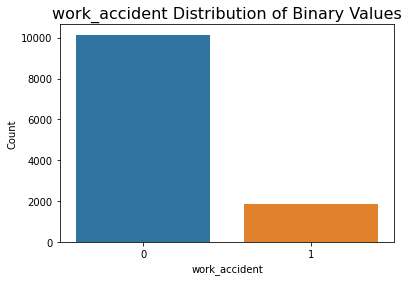

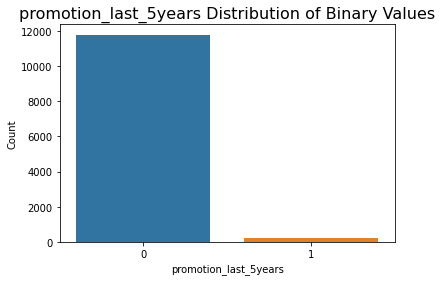

In [195]:
# view distribution of the binary targets
binary_cols = ['work_accident', 'promotion_last_5years']
for col in binary_cols:
    plt.figure(figsize=(6, 4))
    val_counts = no_dupes_df[col].value_counts().reset_index()
    sns.barplot(data=val_counts, x=val_counts.columns[0], y=val_counts.columns[1])
    plt.title(f'{col} Distribution of Binary Values', fontsize=16)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

### Binary Columns Analysis:
- **Work Accident** is severely imbalanced, which seems normal and we would assume that work accident employees are more likely to leave. So this features on first glance looks correct and important.


- **Promotion Last 5 Years** is even more severely imbalanced, which seems odd. There is a confounder in this that if the company is made up of mostly new employees, then they did not have the opportunity to reach 5 years. For instance, if most employees are 1 to 2 years, then it seems appropriate that they may not have gotten a promotion. The distribution of Years of Service will have to be analyzed. As well, **feature engineering** a new feature which looks at **whether an employee has been there for at least 5 years and has not had a promotion** may be a good feature to exclude new employees from this signal.

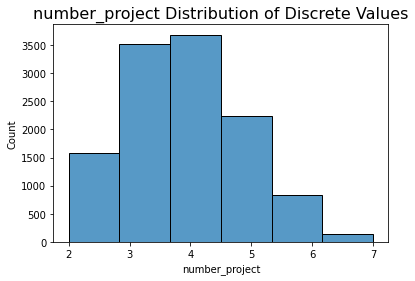

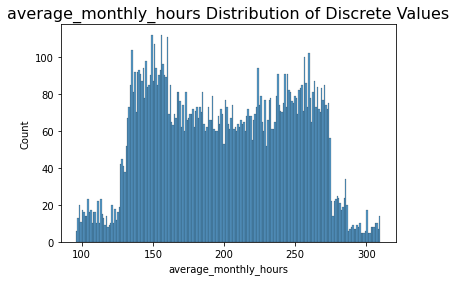

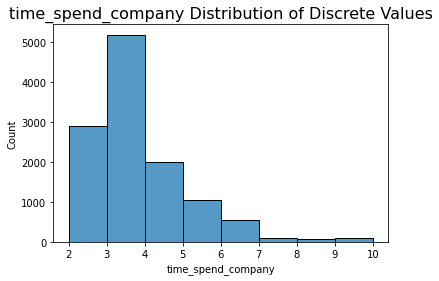

In [196]:
# Look at the distribution of Descrete Numeric Columns
for col in discrete_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=no_dupes_df[col], bins=no_dupes_df[col].nunique())
    plt.title(f'{col} Distribution of Discrete Values', fontsize=16)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


### Analysis of the Discrete Variables
- **Number of Projects:** Looks to be a fairly **normal distribution**. The correlation of this to the target and to the average monthly hours will be interesting follow-up.


- **Average Monthly Hours:** This is **not a normal distribution**. There are no outliers, as that was explored in the boxplots. This variable will be looked for correlation with other variables but overall looks to be a good variable.


- **Time Spend at Company:** This **right skewed** and has been shown to have some outliers. Those outliers may give a significant story for the reason for turnover. For instance, if the >6 year employees have fewer projects or fewer monthly hours, then perhaps they show that the newer employees may need lower hours or fewer projects. The outlier issue will be compare more later.

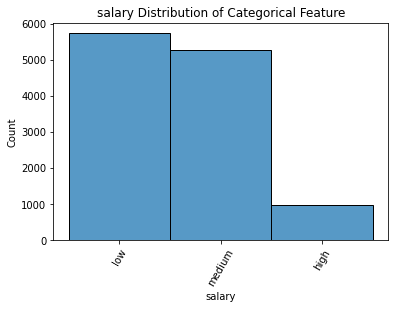

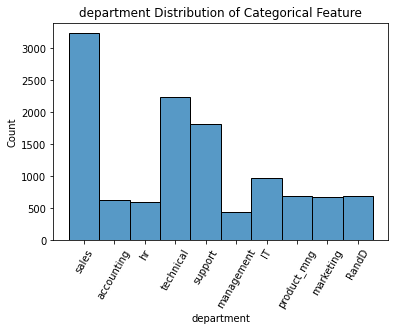

In [197]:
# view the categorical features
cat_cols = ['salary', 'department']
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=no_dupes_df[col], bins=no_dupes_df[col].nunique())
    plt.title(f'{col} Distribution of Categorical Feature')
    plt.xlabel(col)
    plt.xticks(rotation=60)
    plt.ylabel('Count')
    plt.show()


### Categorical Features Analysis:
- **Salary**: This distribution is **right skewed**, which is too be somewhat expected as companies tend to have incomes distribution imbalanced towards the top where there are fewer roles.


- **Department**: Has a **non-uniform distribution** with Sales, Technical, and Support being quite large comparatively. There may be a feature to engineered between **Department and Salary** since certain fields may be more accepting of a low salary compared to others.

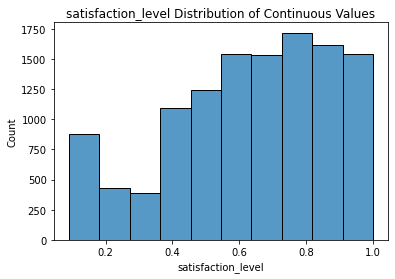

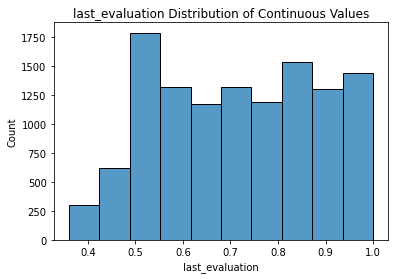

In [198]:
# view the distribution of continuous features
continuous_cols = ['satisfaction_level', 'last_evaluation']
for col in continuous_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=no_dupes_df[col], bins=10)
    plt.title(f'{col} Distribution of Continuous Values')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


### Continuous Features Analysis:
- **Satisfaction Level**: the distribution is **left-skewed** and to my surprise has a lot of positive reviews. If there was a real problem with the company, I would expect a more normal or right-skewed distribution of satisfaction. This brings up the question of whether the employees thought the survey could be linked back to them, then they may not give an honest rating. The **correlation between this feature and others, including the target** will be very interesting.


- **Last Evaluation**: the distribution is **not-normally** distributed and there is a spike at 0.5. There could be an issue with low-evaluations causing employees to feel not valued. This will be something to keep in mind, since they seem to be satisfied but perhaps they are getting bad reviews which they leads to them being disappointed.

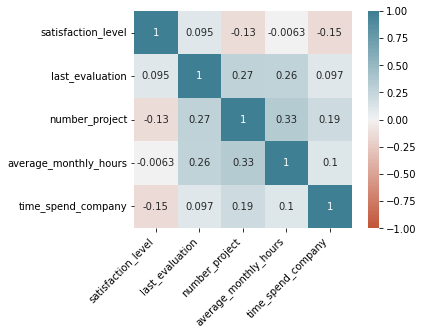

In [199]:
# view the correlation plot of non-binary columns
non_binary_cols = continuous_cols + discrete_cols
corr = no_dupes_df[non_binary_cols].corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

### Numeric Column Cross-Correlation:
- There appears to be **no significant cross-correlation** in the **continuous and discrete variables**.

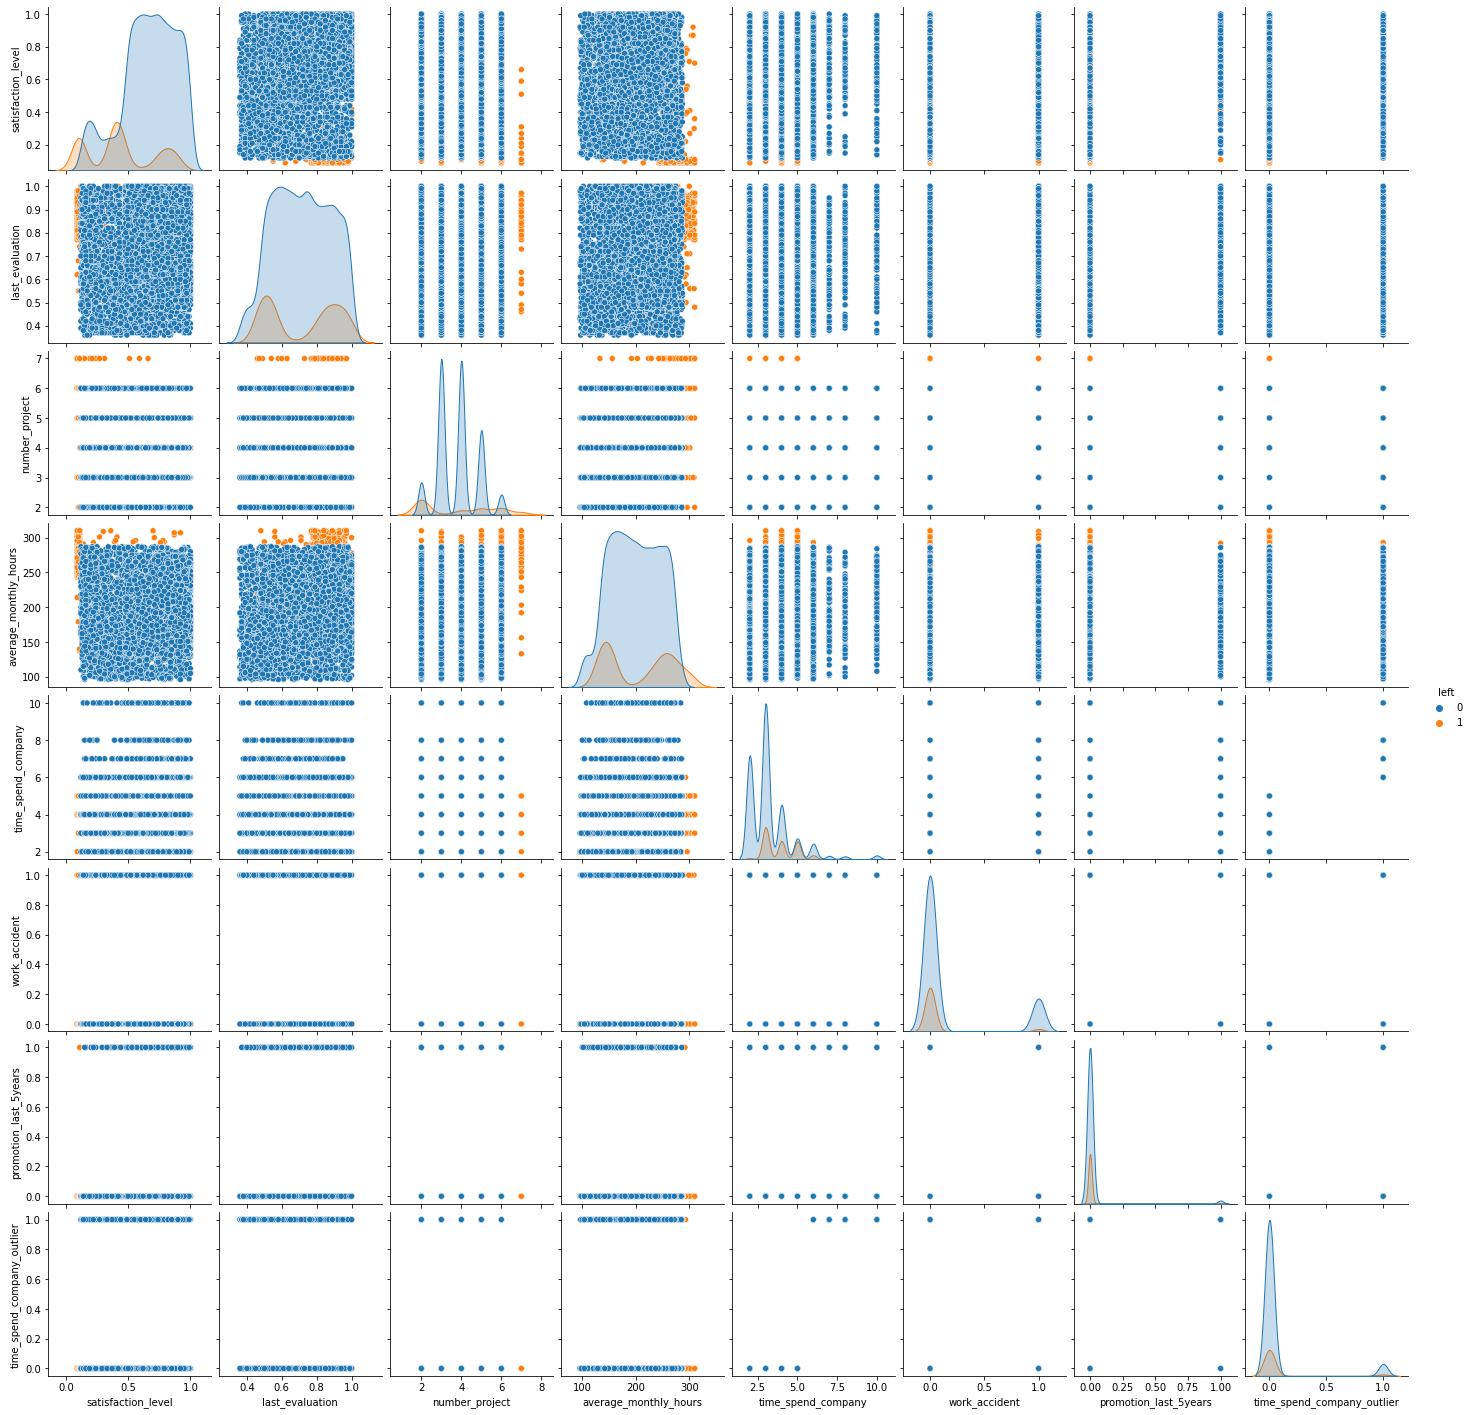

In [200]:
# Create a scatter plot looking at relationships between features
sns.pairplot(data=no_dupes_df, hue='left')
plt.show()


### Pair Plot Analysis:

This is very insightful and by using the hue set to the target, there are some very significant patterns viewable.

- **Satisfaction Level**: 
    - If the satisfaction level is low, then the employee tends to leave.
- **Number of Projects**:
    - If the number of projects is high, then the employee tends to leave.
- **Average Monthly Hours**:
    - If the number of average monthly hours is high, then the employee tends to leave.
- **Time Spend at the Company**:
    - The employees who leave, tend to be 5 for fewer years with a combination of either high number of projects or high number of average monthly hours or very low satisfaction level.
    
#### It seems that almost all of the prediction could be done using these four features. This will be kept in mind later.

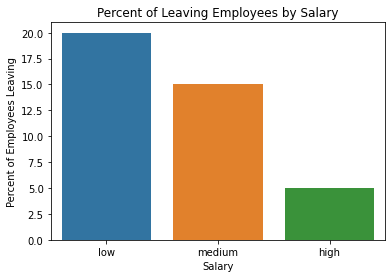

In [201]:
# view the percent of employees who left based on their salary
salary_left = no_dupes_df.groupby(['salary'])['left'].mean().reset_index()
salary_left['left'] = salary_left['left'].apply(lambda x: round(100*x))
salary_left = salary_left.rename(columns={'left':'percent_left'})

sns.barplot(data = salary_left, x='salary', y='percent_left', order=['low', 'medium', 'high'])
plt.title('Percent of Leaving Employees by Salary')
plt.xlabel('Salary')
plt.ylabel('Percent of Employees Leaving')
plt.show()

### Salary and Left Analysis:
The salary of employees does appear to have an impact on whether employees leave. 

#### Would a higher salary keep employees even if they have many projects and many hours?

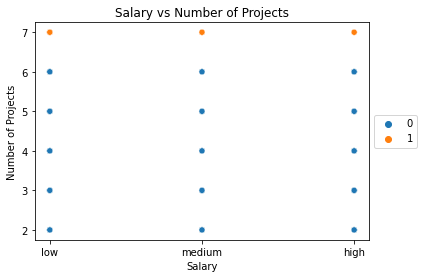

In [202]:
no_dupes_df[['salary', 'number_project', 'left']]
sns.scatterplot(data=no_dupes_df, x='salary', y='number_project', hue='left')
# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Salary vs Number of Projects')
plt.ylabel('Number of Projects')
plt.xlabel('Salary')
plt.show()

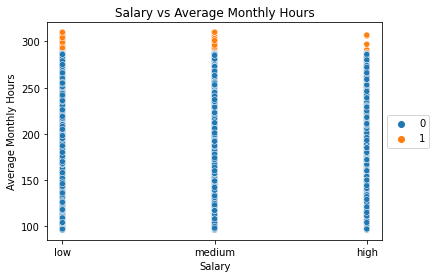

In [203]:
no_dupes_df[['salary', 'average_monthly_hours', 'left']]
sns.scatterplot(data=no_dupes_df, x='salary', y='average_monthly_hours', hue='left')
# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Salary vs Average Monthly Hours')
plt.ylabel('Average Monthly Hours')
plt.xlabel('Salary')
plt.show()

### Salary vs Number of Projects and Monthly Hours Analysis:
- The higher salary still sees people leave at a higher rate when they are working on 7 projects compared to those working on less than 7.
- The higher salary does not keep people from leaving when they have monthly hours above 275.

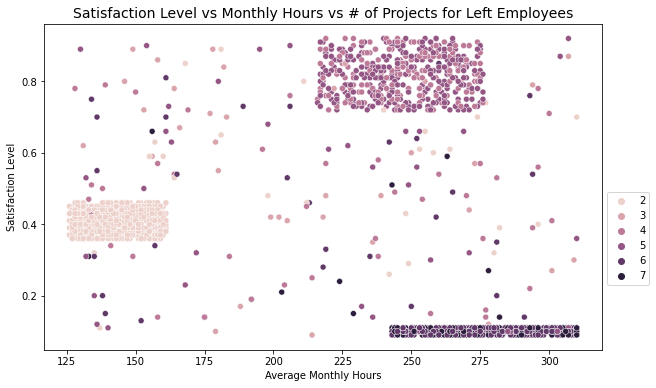

In [204]:
# look at the users who left with low satisfaction level and monthly hours
user_left = no_dupes_df[no_dupes_df['left'] == 1]
user_left['left'] = 'Employee Left'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=user_left, x='average_monthly_hours', y='satisfaction_level', hue='number_project')
plt.title('Satisfaction Level vs Monthly Hours vs # of Projects for Left Employees', fontsize=14)
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')
plt.legend(bbox_to_anchor= (1.0, 0.5))
plt.show()

#### Monthly Hours vs Satisfaction vs # of Projects Analysis:
- There seems to be three distict employee groups that leave based on satisfaction ratings:
    - **Low Satisfaction Group** that have high monthly hours and high number of projects
        - Satisfaction < 0.1
        - Average Monthly Hours > 240
    - **Mid Satisfaction Group** that has as a low number of projects and a low number of projects
        - Satisfaction between 0.35 to 0.45
        - Average Monthly Hours between 125 to 165
    - **High Satisfaction Group** that has a mid-to-high number of projects and work a mid-to-high number of hours
        - Satisfaction > 0.7
        - Average Monthly Hours between 215 to 275

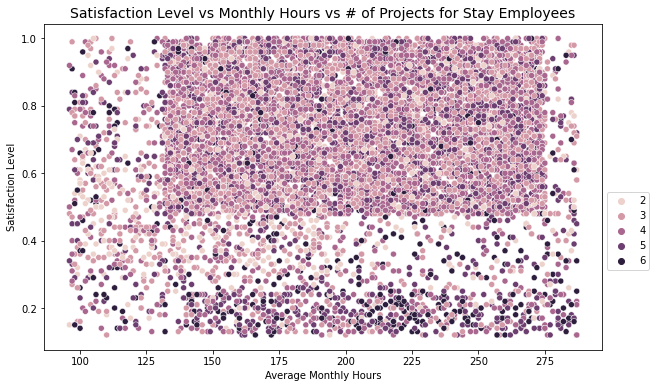

In [205]:
# look at the users who did not leave comparing satisfaction levels and monthly hours
user_stayed = no_dupes_df[no_dupes_df['left'] == 0]
user_stayed['left'] = 'Employee Stayed'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=user_stayed, x='average_monthly_hours', y='satisfaction_level', hue='number_project')
plt.title('Satisfaction Level vs Monthly Hours vs # of Projects for Stay Employees', fontsize=14)
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')
plt.legend(bbox_to_anchor= (1.0, 0.5))
plt.show()

### Analysis of the Users Who did not Leave:
- There is a fairly even distribution of satisfaction levels, hours worked, and projects below 7 projects.

#### Since there is no true pattern among the employees who stayed, but there are strong patterns among the employees who left, the clusters of leaving employees will be explored more.

## High Satisfaction Group High Hours and Mid-to-High Hours

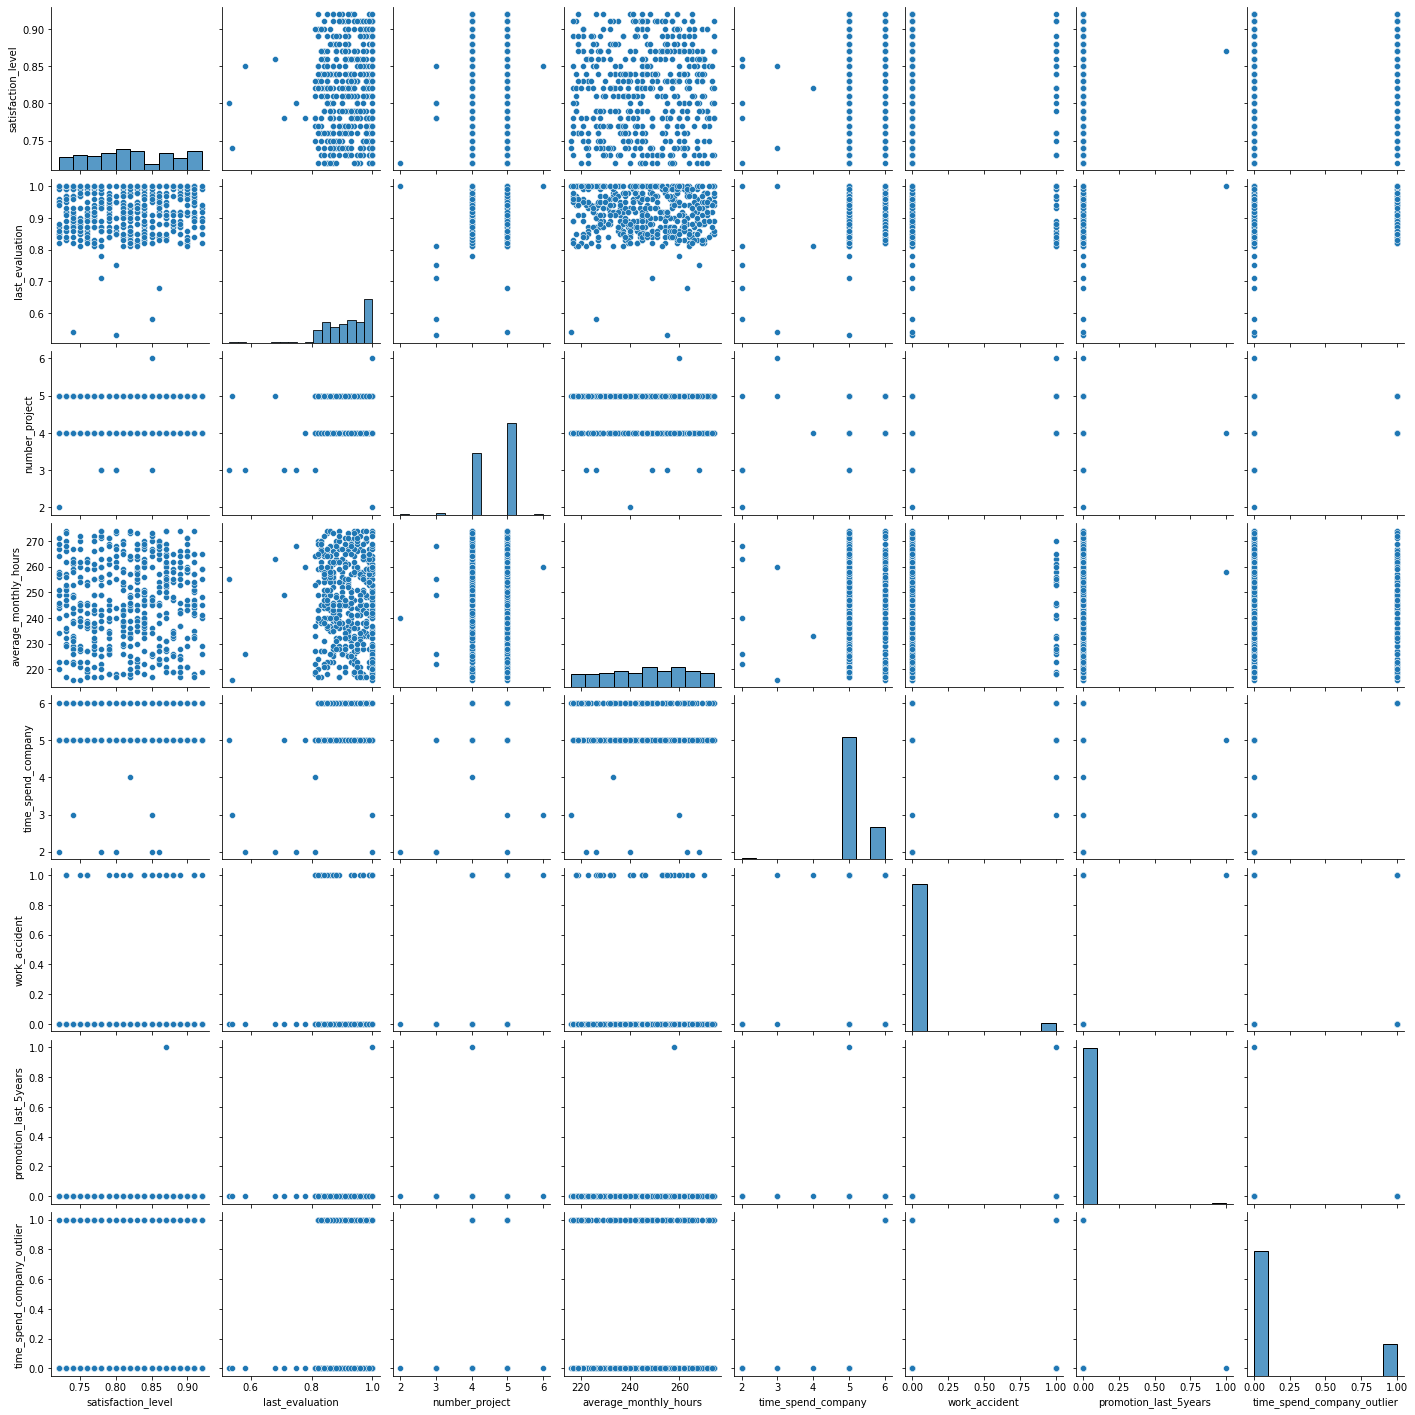

In [206]:
# look at the high satisfaction but left group
high_satisfaction_left = user_left[(user_left['satisfaction_level'] > 0.7)&(user_left['average_monthly_hours'] > 215)&(user_left['average_monthly_hours'] < 275)]
sns.pairplot(data=high_satisfaction_left)

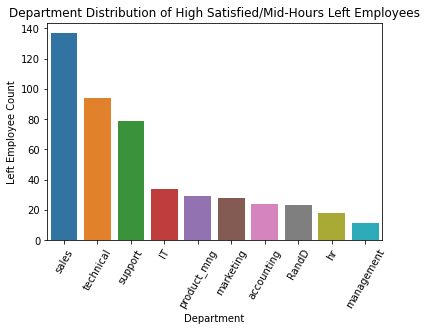

In [207]:
# what department are these employees mostly in
grouped_high_satisfaction_left = high_satisfaction_left['department'].value_counts().reset_index()
grouped_high_satisfaction_left.columns = ['department', 'employee_count']
sns.barplot(data=grouped_high_satisfaction_left, x='department', y='employee_count')
plt.xticks(rotation=60)
plt.title('Department Distribution of High Satisfied/Mid-Hours Left Employees')
plt.xlabel('Department')
plt.ylabel('Left Employee Count')
plt.show()

### High Satisfaction and Mid-to-High Work hours Leaving Employees Analysis:
- This pair plot shows that they tend to fall into a category of:
    - Worked at the company 5 or more years
    - No Promotion in the last 5 years
    
- The Department Distribution is not overly represented by one department, so this looks to be a general trend among all departments.

#### Create a Column that will indicate worked 5 years or more and did not get a promotion


In [208]:
# create a binary column using more than 4 years and no promotion
no_dupes_df['over_4yr_no_promo'] = no_dupes_df.apply(lambda row: 1 if (row['promotion_last_5years'] == 0)&(row['time_spend_company'] > 4) else 0, axis=1)

no_dupes_df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,time_spend_company_outlier,over_4yr_no_promo
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0


## Mid Satisfaction Low Hours + Low Projects Group that Left

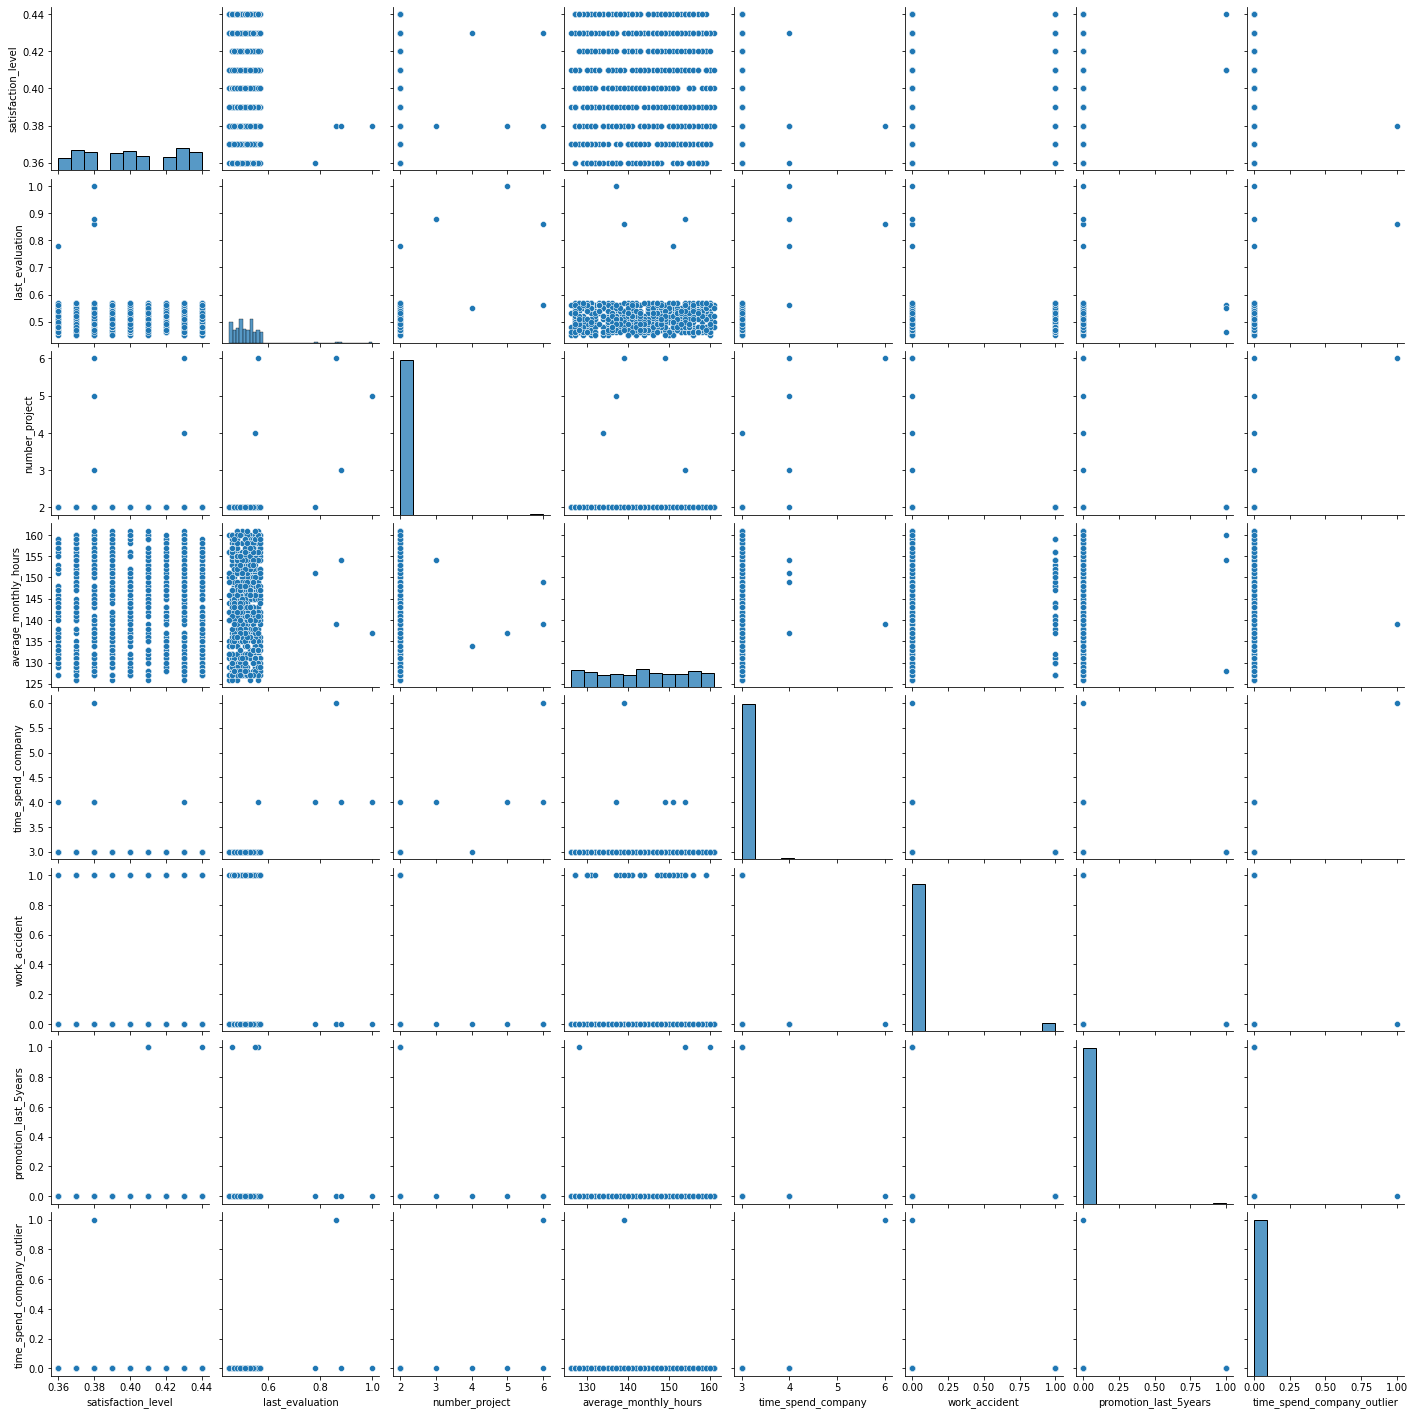

In [209]:
# look at the mid satisfaction but left group
mid_satisfaction_left = user_left[(user_left['satisfaction_level'] < 0.45)&(user_left['satisfaction_level'] > 0.35)&(user_left['average_monthly_hours'] > 125)&(user_left['average_monthly_hours'] < 165)]
sns.pairplot(data=mid_satisfaction_left)

### Mid-Satisfaction Group Analysis:
This group looks to have a fairly low last evaluation score on average and they are employees with a low numer of projects and who typically have only been at the company for three years.
- Low Evaluation Score
- Low Number of Projects
- Three Years at the Company

#### These employees are getting a low evaluation even though they do not seem to be overly worked. They might be either bored and thus underperforming and should have their project number increased. Or they might be employees with a poor work ethic and should be allowed to leave.

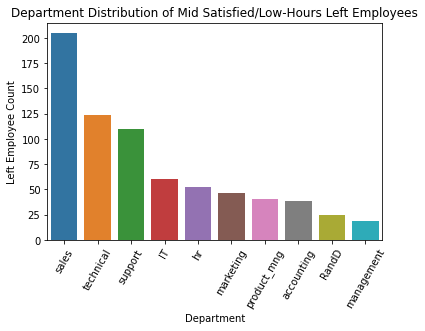

In [210]:
# what department are these employees mostly in
grouped_mid_satisfaction_left = mid_satisfaction_left['department'].value_counts().reset_index()
grouped_mid_satisfaction_left.columns = ['department', 'employee_count']
sns.barplot(data=grouped_mid_satisfaction_left, x='department', y='employee_count')
plt.xticks(rotation=60)
plt.title('Department Distribution of Mid Satisfied/Low-Hours Left Employees')
plt.xlabel('Department')
plt.ylabel('Left Employee Count')
plt.show()

#### These employees are evenly distributed between the departments

## Low Satisfaction and High Work Hours Employees Left

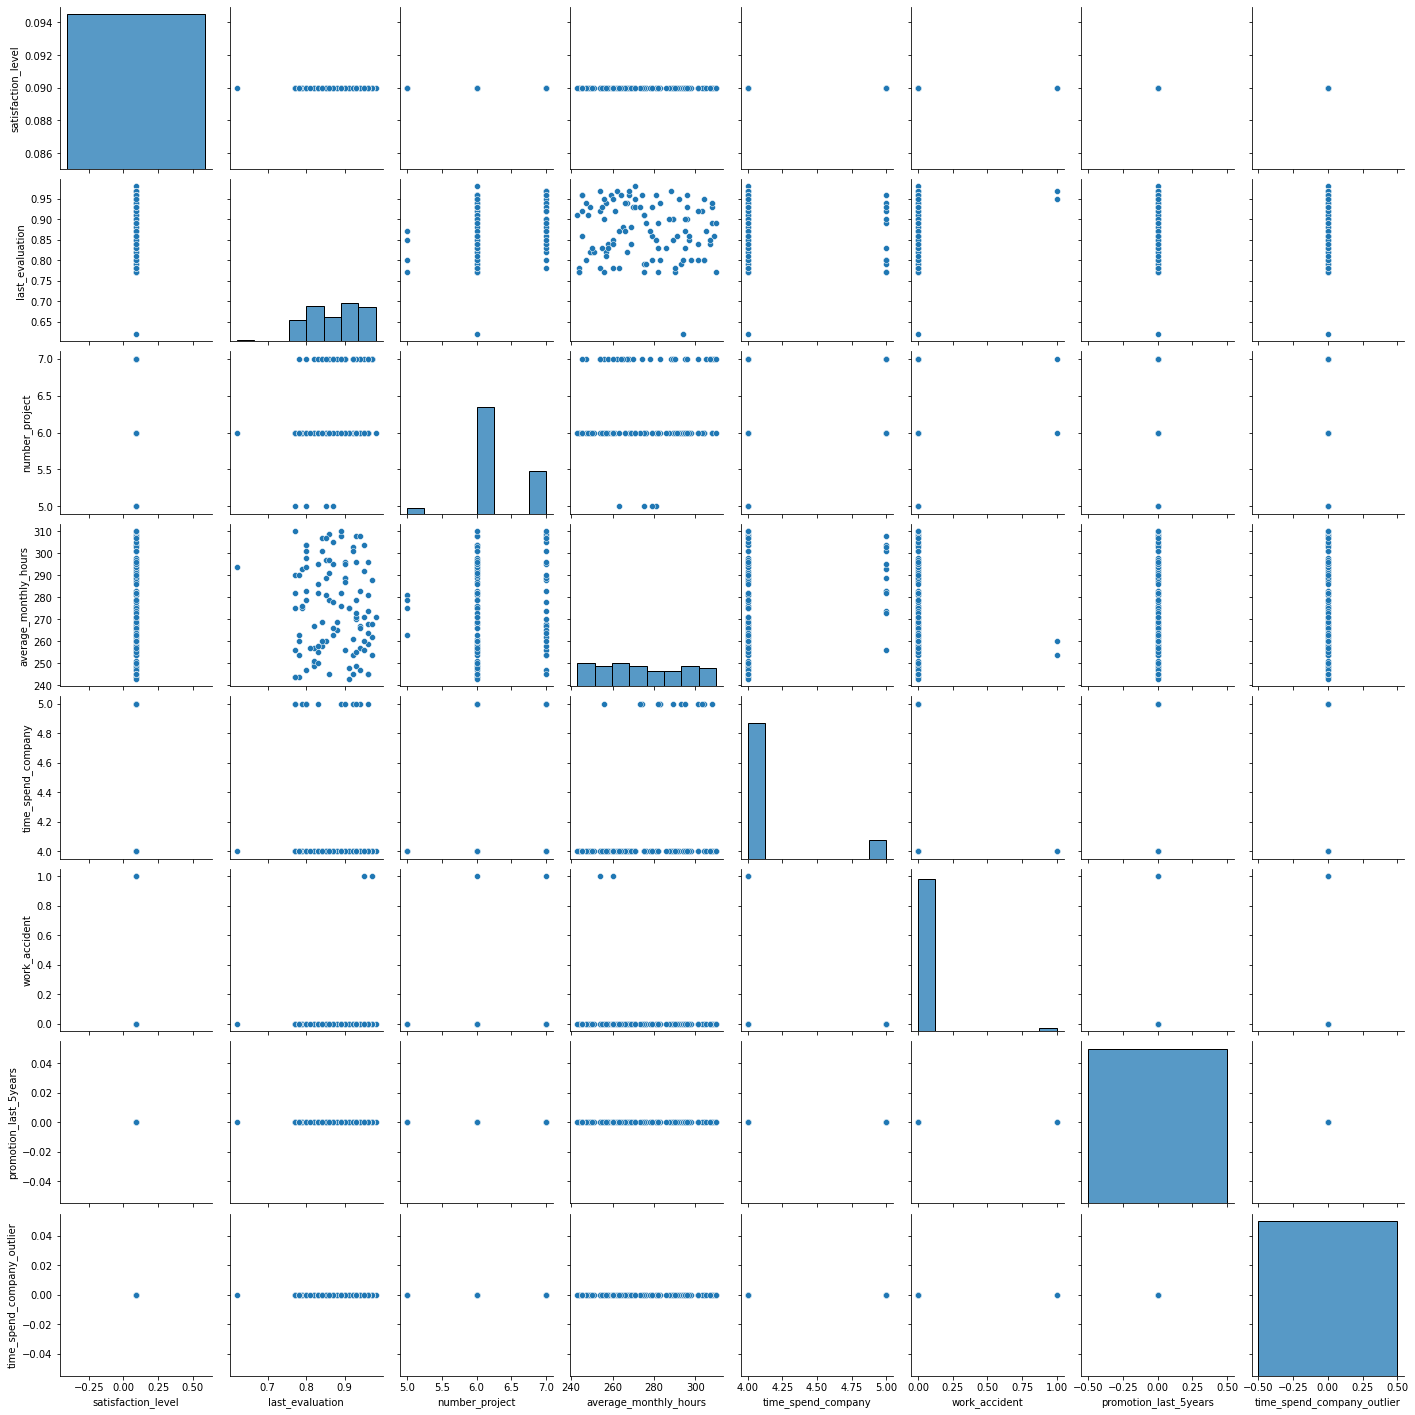

In [211]:
# look at the low satisfaction and left group
low_satisfaction_left = user_left[(user_left['satisfaction_level'] < 0.1)&(user_left['average_monthly_hours'] > 240)]
sns.pairplot(data=low_satisfaction_left)

### Low Satisfaction and High Hours Employees Left Analysis:
These employees high evaluation scores, but low satisfaction scores. As well, they typically have been at the company for 4 or 5 years and have not received a promotion. 
- High Evaluation Score
- Low Satisfaction Score
- 4 or 5 years
- No Promotion

#### This group should really be the focus of retention to since they perform at a high level but are likely not getting the promotion they deserve and also may be overly worked.

In [212]:
# create a column to try to capture the relationship between high evaluation and low satisfaction
no_dupes_df['over_worked_high_performer'] = no_dupes_df['number_project'] * no_dupes_df['average_monthly_hours'] * no_dupes_df['last_evaluation'] / no_dupes_df['satisfaction_level']
no_dupes_df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,time_spend_company_outlier,over_4yr_no_promo,over_worked_high_performer
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,437.947368
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1,1,1408.250000
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,15232.000000
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,1347.291667
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,446.918919


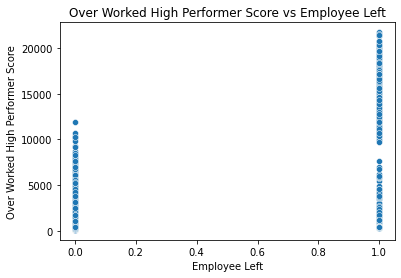

In [213]:
sns.scatterplot(data=no_dupes_df, x='left', y='over_worked_high_performer')
plt.title('Over Worked High Performer Score vs Employee Left')
plt.xlabel('Employee Left')
plt.ylabel('Over Worked High Performer Score')
plt.show()

#### Here there is a score that seems to almost signify the limit that signals over worked high performer likely to leave, if greater than 10000 then it seems very likely.

### Insights

### General Guidelines:
- Employees with **more than 6 projects** tend to leave
- Employees with **average monthly hours above ~275** tend to leave.
- Employees who have a **satisfaction level at or below 0.1** tend to leave.

### There are three main groups of Employees who leave:
- **High Satisfaction Employees who are Mid-Level Performers**:
    - They typically leave because they have been at the company for greater than 5 years and have not had a promotion
    
- **Mid Satisfaction Employees who are Under Perfomers**:
    - They typically have few projects, work below the average number of hours and are 3 years or less at the company.
    
- **Low Satisfaction Employees who are Over Performers**:
    - They have many projects, work high average number of yours and are at 4 or 5 years tenure, but have not recieved a promotion.
    
   

### Final View of Features and Target on Correlation Matrix

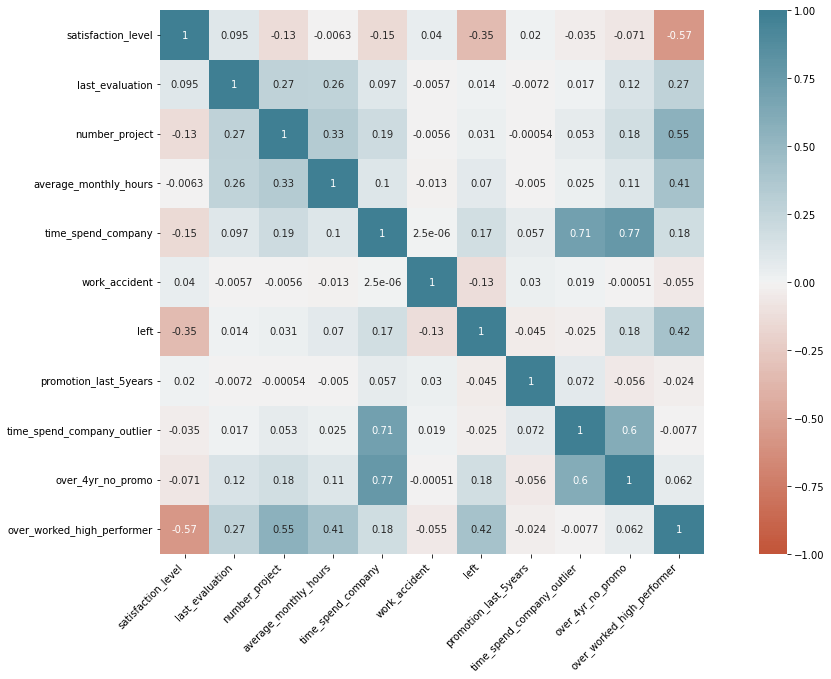

In [214]:
# check the colinearity of the final features
final_corr = no_dupes_df.corr()
plt.figure(figsize=(20, 10))
ax = sns.heatmap(
    final_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

This is a binary classification task. The model can return a probability for the strength of the classification and that can be used to better understand which employees to focus on attending to first.

From the EDA, the relationship between the features and the target is not a linear relationship and thus I will **exclude Logistic Regression** from the modeling.

### Identify the types of models most appropriate for this task.

From this course, the types of models that seem appropriate are:

- Random Forest
- XGBoost
- Naive Bayes

# Modeling

## Random Forest Default with all Features

Use default hyperparameters and all of the features for the first round of analysis. The Random Forest automatically does feature selection based and the categorical features do not need to be one hot encoded. As well, the Random Forest is immune to outliers and thus they do not need to be removed.

In [215]:
# remove the outlier column and create X 
X = no_dupes_df.drop(columns=['left', 'time_spend_company_outlier'])
y = no_dupes_df['left']

# create dummy variables
X = pd.get_dummies(X, columns=cat_cols)

# view the columns and teh data is all numeric
X.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   satisfaction_level          11991 non-null  float64
 1   last_evaluation             11991 non-null  float64
 2   number_project              11991 non-null  int64  
 3   average_monthly_hours       11991 non-null  int64  
 4   time_spend_company          11991 non-null  int64  
 5   work_accident               11991 non-null  int64  
 6   promotion_last_5years       11991 non-null  int64  
 7   over_4yr_no_promo           11991 non-null  int64  
 8   over_worked_high_performer  11991 non-null  float64
 9   salary_high                 11991 non-null  uint8  
 10  salary_low                  11991 non-null  uint8  
 11  salary_medium               11991 non-null  uint8  
 12  department_IT               11991 non-null  uint8  
 13  department_RandD            119

In [216]:
# split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# instantiate the Random Forest Model
rf_clf = RandomForestClassifier()


scores = cross_validate(rf_clf, 
                        X_train, 
                        y_train, 
                        cv=5, 
                        scoring=('f1', 'roc_auc', 'precision', 'recall'), 
                        return_train_score=True)

print('Random Forest Default Hyperparameters Results\n')
print('CV Test Results:')
print('\tF1 Score:', round(np.mean(scores['test_f1']), 3))
print('\tROC-AUC Score:', round(np.mean(scores['test_roc_auc']), 3))
print('\tPrecision Score:', round(np.mean(scores['test_precision']), 3))
print('\tRecall Score:', round(np.mean(scores['test_recall']), 3))



Random Forest Default Hyperparameters Results

CV Test Results:
	F1 Score: 0.944
	ROC-AUC Score: 0.982
	Precision Score: 0.985
	Recall Score: 0.906


In [217]:
# create a dataframe to store the model results
model_results = pd.DataFrame(columns=['model', 'f1', 'roc_auc', 'precision', 'recall'])
model_results = pd.concat([model_results, pd.DataFrame([{'model':'Random Forest Default',
                                                         'f1':round(np.mean(scores['test_f1']), 3),
                                                         'roc_auc':round(np.mean(scores['test_roc_auc']), 3),
                                                         'precision':round(np.mean(scores['test_precision']), 3),
                                                         'recall':round(np.mean(scores['test_recall']), 3)}])], ignore_index=True)

model_results

,model,f1,roc_auc,precision,recall
0,Random Forest Default,0.944,0.982,0.985,0.906


In [218]:
# fit the default model on the training data
rf_clf.fit(X_train, y_train)

# test the best model on the test data
y_preds = rf_clf.predict(X_test)

# calculate f1
recall = recall_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
f1 = 2 * (recall * precision) / (recall + precision) 

# view the evaluation metrics
print('Default Random Forest Model')
print('\nTest Set Results:')
print('F1:', round(f1, 3))
print('ROC-AUC:', round(roc_auc_score(y_test, y_preds), 3))
print('Precision:', round(precision, 3))
print('Recall:', round(recall, 3))

Default Random Forest Model

Test Set Results:
F1: 0.951
ROC-AUC: 0.958
Precision: 0.986
Recall: 0.92


## XGBoost Default with all Features

Use default hyperparameters and all of the features for the first round of analysis. XGBoost automatically does feature selection based and the categorical features do not need to be one hot encoded. As well, XGBoost is immune to outliers and thus they do not need to be removed.

In [219]:
# instantiate the XGBoost Model
xgb_clf = XGBClassifier()


scores = cross_validate(xgb_clf, 
                        X_train, 
                        y_train, 
                        cv=5, 
                        scoring=('f1', 'roc_auc', 'precision', 'recall'), 
                        return_train_score=True)

print('XGBoost Default Hyperparameters Results\n')
print('CV Test Results:')
print('\tF1 Score:', round(np.mean(scores['test_f1']), 3))
print('\tROC-AUC Score:', round(np.mean(scores['test_roc_auc']), 3))
print('\tPrecision Score:', round(np.mean(scores['test_precision']), 3))
print('\tRecall Score:', round(np.mean(scores['test_recall']), 3))

[12:00:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:00:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:00:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:00:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [220]:
# fit the default model on the training data
xgb_clf.fit(X_train, y_train)

# test the best model on the test data
y_preds = xgb_clf.predict(X_test)

# calculate f1
recall = recall_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
f1 = 2 * (recall * precision) / (recall + precision) 

# view the evaluation metrics
print('Default XGBoost Model')
print('\nTest Set Results:')
print('F1:', round(f1, 3))
print('ROC-AUC:', round(roc_auc_score(y_test, y_preds), 3))
print('Precision:', round(precision, 3))
print('Recall:', round(recall, 3))

[12:00:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Default XGBoost Model

Test Set Results:
F1: 0.945
ROC-AUC: 0.959
Precision: 0.967
Recall: 0.925


In [221]:
# add the default XGBoost results to the model results dataframe
model_results = pd.concat([model_results, pd.DataFrame([{'model':'XGBoost Default CV',
                                                         'f1':round(np.mean(scores['test_f1']), 3),
                                                         'roc_auc':round(np.mean(scores['test_roc_auc']), 3),
                                                         'precision':round(np.mean(scores['test_precision']), 3),
                                                         'recall':round(np.mean(scores['test_recall']), 3)}])], ignore_index=True)

### Random Forest Hyperparameter Tuning

In [222]:
# split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

# save the test sets for the final model
final_X_test = X_test.copy()
final_y_test = y_test.copy()

# view the shapes of the data
X_train.shape, X_test.shape

((8993, 22), (2998, 22))

In [223]:
# create the hyperparameters search space
cv_params = {
    # randomly sample numbers from 4 to 204 estimators
    'n_estimators': randint(120, 800),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'min_samples_split': uniform(0.01, 0.199),
    # randomly sample numbers from 5 to 30
    'max_depth':randint(5,30),
    # categoricaly choose between balanced and imbalanced
    'class_weight':['balanced', None]
    }


# define the scoring params
scoring = {'f1', 'precision', 'recall', 'roc_auc'}

split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [224]:
# create the Random Search CV
rf_cv = RandomizedSearchCV(rf_clf, cv_params, n_iter=50, scoring=scoring, refit='f1', n_jobs=-1, cv=custom_split, random_state=42)

In [225]:
%%time
rf_cv.fit(X_train, y_train)

Wall time: 36.2 s


RandomizedSearchCV(cv=PredefinedSplit(test_fold=array([ 0, -1, ..., -1, -1])),
                   estimator=RandomForestClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', None],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001361CCD5E48>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001361CCF2D48>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001361CCD5C88>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001361CCF2788>},
                   random_state=42, refit='f1',
                   scoring={'roc_auc', 'recall', 'f1', 'precision'})

In [226]:
rf_cv.best_params_

{'class_weight': 'balanced',
 'max_depth': 19,
 'max_features': 0.264188100630479,
 'min_samples_split': 0.013111644941497592,
 'n_estimators': 640}

In [227]:
rf_f1 = rf_cv.cv_results_['mean_test_f1'][rf_cv.best_index_]
rf_roc_auc = rf_cv.cv_results_['mean_test_roc_auc'][rf_cv.best_index_]
rf_prec = rf_cv.cv_results_['mean_test_precision'][rf_cv.best_index_]
rf_rec = rf_cv.cv_results_['mean_test_recall'][rf_cv.best_index_]


print('Random Forest Tuned Hyperparameters Results\n')
print('CV Results:')
print('\tF1 Score:', round(rf_f1, 3))
print('\tROC-AUC Score:', round(rf_roc_auc, 3))
print('\tPrecision Score:', round(rf_prec, 3))
print('\tRecall Score:', round(rf_rec, 3))

Random Forest Tuned Hyperparameters Results

CV Results:
	F1 Score: 0.95
	ROC-AUC Score: 0.984
	Precision Score: 0.983
	Recall Score: 0.92


In [228]:
# add the tuned Random Forest results to the model results dataframe
temp_df = pd.DataFrame([{'model':'Random Forest Tuned CV',
                        'f1':round(rf_f1, 3),
                        'roc_auc':round(rf_roc_auc, 3),
                        'precision':round(rf_prec, 3),
                        'recall':round(rf_rec, 3)}])
model_results = pd.concat([model_results, temp_df], ignore_index=True)
model_results

,model,f1,roc_auc,precision,recall
0,Random Forest Default,0.944,0.982,0.985,0.906
1,XGBoost Default CV,0.942,0.982,0.970,0.916
2,Random Forest Tuned CV,0.950,0.984,0.983,0.920


In [229]:
# test the best model on the test data
rf_best = rf_cv.best_estimator_

rf_best.fit(X_train, y_train)

y_preds = rf_best.predict(X_test)

# calculate f1
recall = recall_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
f1 = 2 * (recall * precision) / (recall + precision) 

# view the evaluation metrics
print('Best Hyperparameter Tuned Random Forest Model')
print('\nTest Results:')
print('F1:', round(f1, 3))
print('ROC-AUC:', round(roc_auc_score(y_test, y_preds), 3))
print('Precision:', round(precision, 3))
print('Recall:', round(recall, 3))


Best Hyperparameter Tuned Random Forest Model

Test Results:
F1: 0.954
ROC-AUC: 0.961
Precision: 0.987
Recall: 0.924


## XGBoost Hyperparameter Tuning

In [230]:
# create the hyperparameters search space
cv_params = {
    # randomly sample numbers from 4 to 204 estimators
    'n_estimators': randint(120, 800),
    # randomly sample from 0.01 to 0.1 learning rate
    'eta': uniform(0.01, 0.1),
    # randomly sample from 3 to 25 for max depth
    'max_depth': randint(3, 25),
    # randomly sample from 1 to 7 for min child weight
    'min_child_weight':randint(1, 7),
    # randomly sample from 0.6 to 1.0 for subsample
    'subsample':uniform(0.6, 1.0),
    # randomly choose weight for positive class between 1 and 4
    'scale_pos_weight':randint(1, 4)
    }


# define the scoring params
scoring = {'f1', 'precision', 'recall', 'roc_auc'}

split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [231]:
xgb_cv = RandomizedSearchCV(xgb_clf, cv_params, n_iter=50, scoring=scoring, refit='f1', n_jobs=-1, cv=custom_split, random_state=42)

In [232]:
%%time
xgb_cv.fit(X_train, y_train)

[12:01:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 24.3 s


RandomizedSearchCV(cv=PredefinedSplit(test_fold=array([ 0, -1, ..., -1, -1])),
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_...
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001361C7F0108>,
                                        'n_estimators': <scipy.stats._distn_infrastr

In [233]:
xgb_f1 = xgb_cv.cv_results_['mean_test_f1'][xgb_cv.best_index_]
xgb_roc_auc = xgb_cv.cv_results_['mean_test_roc_auc'][xgb_cv.best_index_]
xgb_prec = xgb_cv.cv_results_['mean_test_precision'][xgb_cv.best_index_]
xgb_rec = xgb_cv.cv_results_['mean_test_recall'][xgb_cv.best_index_]


print('XGBoost Tuned Hyperparameters Results\n')
print('CV Results:')
print('\tF1 Score:', round(xgb_f1, 3))
print('\tROC-AUC Score:', round(xgb_roc_auc, 3))
print('\tPrecision Score:', round(xgb_prec, 3))
print('\tRecall Score:', round(xgb_rec, 3))

XGBoost Tuned Hyperparameters Results

CV Results:
	F1 Score: 0.953
	ROC-AUC Score: 0.982
	Precision Score: 0.975
	Recall Score: 0.933


In [234]:
# add the tuned XGBoost results to the model results dataframe
temp_df = pd.DataFrame([{'model':'XGBoost Tuned CV',
                        'f1':round(xgb_f1, 3),
                        'roc_auc':round(xgb_roc_auc, 3),
                        'precision':round(xgb_prec, 3),
                        'recall':round(xgb_rec, 3)}])
model_results = pd.concat([model_results, temp_df], ignore_index=True)
model_results

,model,f1,roc_auc,precision,recall
0,Random Forest Default,0.944,0.982,0.985,0.906
1,XGBoost Default CV,0.942,0.982,0.970,0.916
2,Random Forest Tuned CV,0.950,0.984,0.983,0.920
3,XGBoost Tuned CV,0.953,0.982,0.975,0.933


In [235]:
xgb_cv.best_params_

{'eta': 0.04567533266935893,
 'max_depth': 15,
 'min_child_weight': 1,
 'n_estimators': 276,
 'scale_pos_weight': 3,
 'subsample': 0.7652669390630025}

In [236]:
# test the best model on the test data
xgb_best = xgb_cv.best_estimator_

xgb_best.fit(X_train, y_train)

y_preds = xgb_best.predict(X_test)

# calculate f1
recall = recall_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
f1 = 2 * (recall * precision) / (recall + precision) 

# view the evaluation metrics
print('Best Hyperparameter XGBoost Model')
print('\nTest Results:')
print('F1:', round(f1, 3))
print('ROC-AUC:', round(roc_auc_score(y_test, y_preds), 3))
print('Precision:', round(precision, 3))
print('Recall:', round(recall, 3))


[12:01:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Best Hyperparameter XGBoost Model

Test Results:
F1: 0.95
ROC-AUC: 0.96
Precision: 0.975
Recall: 0.926


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



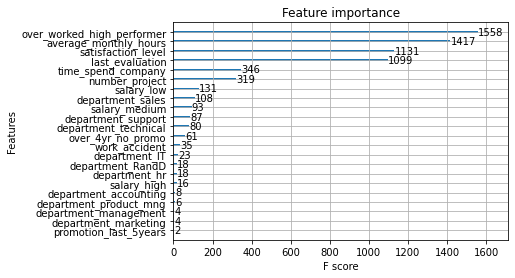

In [237]:
plot_importance(xgb_best)
plt.show()

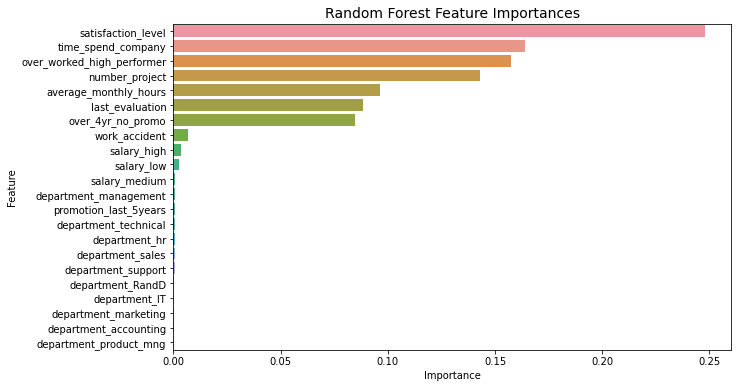

In [238]:
importances = rf_best.feature_importances_
feature_names = X_train.columns
feat_imps = {}
for i, name in enumerate(feature_names):
    feat_imps[name] = importances[i]
    
feat_imps_df = pd.DataFrame([feat_imps]).T.reset_index()
feat_imps_df.columns = ['feature', 'importance']
feat_imps_df = feat_imps_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imps_df, x='importance', y='feature')
plt.title('Random Forest Feature Importances', fontsize=14)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Features to Possibly Remove:
- **Department**
- **Promotion Last 5 Years** (Since it is mostly indicated in the over_4yr_no_promo column)

## Try the modeling with these two features removed for Random Forest

In [239]:
# drop all department columns and the promotion_last_5years
drop_cols = [col for col in X.columns if 'department' in col] + ['promotion_last_5years']
X = X.drop(columns=drop_cols)

# sanity check that the columns were dropped
assert 'promotion_last_5years' not in X.columns
assert len([col for col in X.columns if 'department' in col]) == 0

# split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)



In [240]:
# create the hyperparameters search space
cv_params = {
    # randomly sample numbers from 4 to 204 estimators
    'n_estimators': randint(120, 800),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'min_samples_split': uniform(0.01, 0.199),
    # randomly sample numbers from 5 to 30
    'max_depth':randint(5,30),
    # categoricaly choose between balanced and imbalanced
    'class_weight':['balanced', None]
    }


# define the scoring params
scoring = {'f1', 'precision', 'recall', 'roc_auc'}

split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [241]:
rf_drop_cv = RandomizedSearchCV(rf_clf, cv_params, n_iter=50, scoring=scoring, refit='f1', n_jobs=-1, cv=custom_split, random_state=42)

In [242]:
%%time
rf_drop_cv.fit(X_train, y_train)

Wall time: 28.2 s


RandomizedSearchCV(cv=PredefinedSplit(test_fold=array([ 0, -1, ..., -1, -1])),
                   estimator=RandomForestClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', None],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001361CCDCE08>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001361CCE3048>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001361C8C5288>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001361CCDDE08>},
                   random_state=42, refit='f1',
                   scoring={'roc_auc', 'recall', 'f1', 'precision'})

In [243]:
rf_f1 = rf_drop_cv.cv_results_['mean_test_f1'][rf_drop_cv.best_index_]
rf_roc_auc = rf_drop_cv.cv_results_['mean_test_roc_auc'][rf_drop_cv.best_index_]
rf_prec = rf_drop_cv.cv_results_['mean_test_precision'][rf_drop_cv.best_index_]
rf_rec = rf_drop_cv.cv_results_['mean_test_recall'][rf_drop_cv.best_index_]


print('Random Forest Dropped Feats Tuned Hyperparameters Results\n')
print('CV Results:')
print('\tF1 Score:', round(rf_f1, 3))
print('\tROC-AUC Score:', round(rf_roc_auc, 3))
print('\tPrecision Score:', round(rf_prec, 3))
print('\tRecall Score:', round(rf_rec, 3))

Random Forest Dropped Feats Tuned Hyperparameters Results

CV Results:
	F1 Score: 0.951
	ROC-AUC Score: 0.984
	Precision Score: 0.986
	Recall Score: 0.92


In [244]:
# add the tuned Random Forest dropped feautures results to the model results dataframe
temp_df = pd.DataFrame([{'model':'Random Forest Dropped Feats Tuned CV',
                        'f1':round(rf_f1, 3),
                        'roc_auc':round(rf_roc_auc, 3),
                        'precision':round(rf_prec, 3),
                        'recall':round(rf_rec, 3)}])
model_results = pd.concat([model_results, temp_df], ignore_index=True)
model_results

,model,f1,roc_auc,precision,recall
0,Random Forest Default,0.944,0.982,0.985,0.906
1,XGBoost Default CV,0.942,0.982,0.970,0.916
2,Random Forest Tuned CV,0.950,0.984,0.983,0.920
3,XGBoost Tuned CV,0.953,0.982,0.975,0.933
4,Random Forest Dropped Feats Tuned CV,0.951,0.984,0.986,0.920


In [245]:
rf_drop_cv.best_params_

{'class_weight': 'balanced',
 'max_depth': 29,
 'max_features': 0.30860695757372736,
 'min_samples_split': 0.010103555022067848,
 'n_estimators': 378}

In [246]:
# test the best model on the test data
rf_drop_best = rf_drop_cv.best_estimator_

rf_drop_best.fit(X_train, y_train)

y_preds = rf_drop_best.predict(X_test)

# calculate f1
recall = recall_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
f1 = 2 * (recall * precision) / (recall + precision) 

# view the evaluation metrics
print('Best Hyperparameter Random Forest Model')
print('\nTest Results:')
print('F1:', round(f1, 3))
print('ROC-AUC:', round(roc_auc_score(y_test, y_preds), 3))
print('Precision:', round(precision, 3))
print('Recall:', round(recall, 3))

Best Hyperparameter Random Forest Model

Test Results:
F1: 0.957
ROC-AUC: 0.963
Precision: 0.987
Recall: 0.928


## Try the modeling with these two features removed for XGBoost

In [247]:
# create the hyperparameters search space
cv_params = {
    # randomly sample numbers from 4 to 204 estimators
    'n_estimators': randint(120, 800),
    # randomly sample from 0.01 to 0.1 learning rate
    'eta': uniform(0.01, 0.1),
    # randomly sample from 3 to 25 for max depth
    'max_depth': randint(3, 25),
    # randomly sample from 1 to 7 for min child weight
    'min_child_weight':randint(1, 7),
    # randomly sample from 0.6 to 1.0 for subsample
    'subsample':uniform(0.6, 1.0),
    # randomly choose weight for positive class between 1 and 4
    'scale_pos_weight':randint(1, 4)
    }


# define the scoring params
scoring = {'f1', 'precision', 'recall', 'roc_auc'}

split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [248]:
xgb_drop_cv = RandomizedSearchCV(xgb_clf, cv_params, n_iter=50, scoring=scoring, refit='f1', n_jobs=-1, cv=custom_split, random_state=42)

In [249]:
%%time
xgb_drop_cv.fit(X_train, y_train)

[12:02:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 18.5 s


RandomizedSearchCV(cv=PredefinedSplit(test_fold=array([ 0, -1, ..., -1, -1])),
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_...
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001361CA6D3C8>,
                                        'n_estimators': <scipy.stats._distn_infrastr

In [250]:
xgb_f1 = xgb_drop_cv.cv_results_['mean_test_f1'][xgb_drop_cv.best_index_]
xgb_roc_auc = xgb_drop_cv.cv_results_['mean_test_roc_auc'][xgb_drop_cv.best_index_]
xgb_prec = xgb_drop_cv.cv_results_['mean_test_precision'][xgb_drop_cv.best_index_]
xgb_rec = xgb_drop_cv.cv_results_['mean_test_recall'][xgb_drop_cv.best_index_]


print('XGBoost Dropped Feats Tuned Hyperparameters Results\n')
print('CV Results:')
print('\tF1 Score:', round(xgb_f1, 3))
print('\tROC-AUC Score:', round(xgb_roc_auc, 3))
print('\tPrecision Score:', round(xgb_prec, 3))
print('\tRecall Score:', round(xgb_rec, 3))

XGBoost Dropped Feats Tuned Hyperparameters Results

CV Results:
	F1 Score: 0.953
	ROC-AUC Score: 0.981
	Precision Score: 0.977
	Recall Score: 0.93


In [251]:
# add the tuned XGBoost dropped feautures results to the model results dataframe
temp_df = pd.DataFrame([{'model':'XGBoost Dropped Feats Tuned CV',
                        'f1':round(xgb_f1, 3),
                        'roc_auc':round(xgb_roc_auc, 3),
                        'precision':round(xgb_prec, 3),
                        'recall':round(xgb_rec, 3)}])
model_results = pd.concat([model_results, temp_df], ignore_index=True)
model_results

,model,f1,roc_auc,precision,recall
0,Random Forest Default,0.944,0.982,0.985,0.906
1,XGBoost Default CV,0.942,0.982,0.970,0.916
2,Random Forest Tuned CV,0.950,0.984,0.983,0.920
3,XGBoost Tuned CV,0.953,0.982,0.975,0.933
4,Random Forest Dropped Feats Tuned CV,0.951,0.984,0.986,0.920
5,XGBoost Dropped Feats Tuned CV,0.953,0.981,0.977,0.930


In [252]:
xgb_drop_cv.best_params_

{'eta': 0.0916431873219384,
 'max_depth': 18,
 'min_child_weight': 1,
 'n_estimators': 320,
 'scale_pos_weight': 3,
 'subsample': 0.7865185103998542}

In [253]:
# test the best model on the test data
xgb_drop_best = xgb_drop_cv.best_estimator_

xgb_drop_best.fit(X_train, y_train)

y_preds = xgb_drop_best.predict(X_test)

# calculate f1
recall = recall_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
f1 = 2 * (recall * precision) / (recall + precision) 

# view the evaluation metrics
print('Best Hyperparameter Random Forest Model')
print('\nTest Results:')
print('F1:', round(f1, 3))
print('ROC-AUC:', round(roc_auc_score(y_test, y_preds), 3))
print('Precision:', round(precision, 3))
print('Recall:', round(recall, 3))

[12:02:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Best Hyperparameter Random Forest Model

Test Results:
F1: 0.947
ROC-AUC: 0.96
Precision: 0.968
Recall: 0.926


## Compare the Model CV results

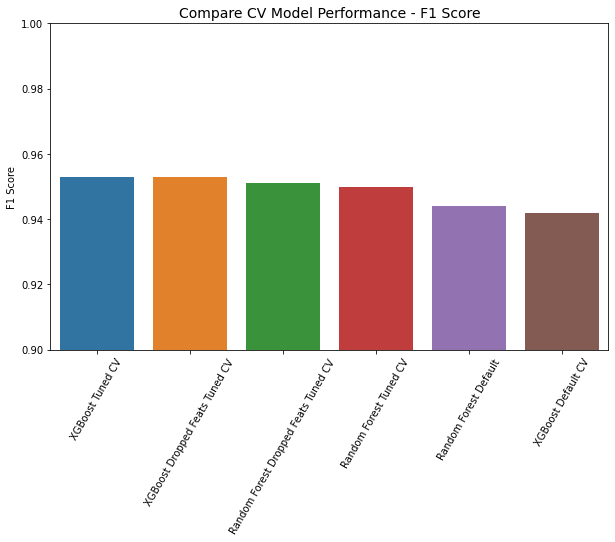

In [254]:
f1 = model_results[['model', 'f1']].sort_values(by=['f1'], ascending=False)
roc_auc = model_results[['model', 'roc_auc']].sort_values(by=['roc_auc'], ascending=False)
precision = model_results[['model', 'precision']].sort_values(by=['precision'], ascending=False)
recall = model_results[['model', 'recall']].sort_values(by=['recall'], ascending=False)

# plot the model performance
plt.figure(figsize=(10, 6))
sns.barplot(data=f1, x='model', y='f1')
plt.title('Compare CV Model Performance - F1 Score', fontsize=14)
plt.xticks(rotation=60)
plt.xlabel('')
plt.ylabel('F1 Score')
plt.ylim(0.9, 1.0)
plt.show()

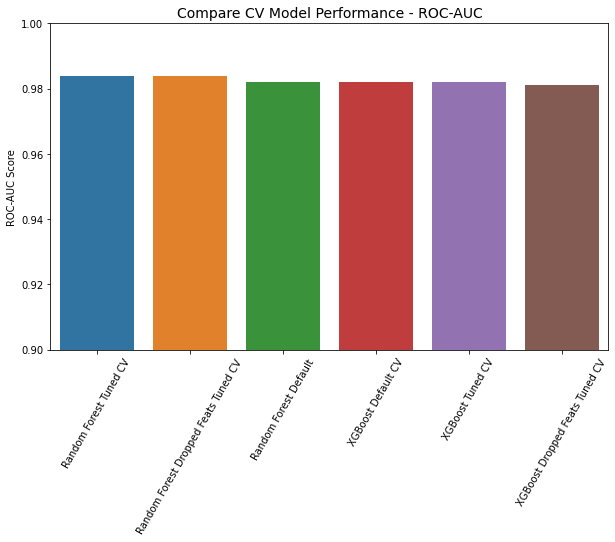

In [255]:
# plot the model performance
plt.figure(figsize=(10, 6))
sns.barplot(data=roc_auc, x='model', y='roc_auc')
plt.title('Compare CV Model Performance - ROC-AUC', fontsize=14)
plt.xticks(rotation=60)
plt.xlabel('')
plt.ylabel('ROC-AUC Score')
plt.ylim(0.9, 1.0)
plt.show()

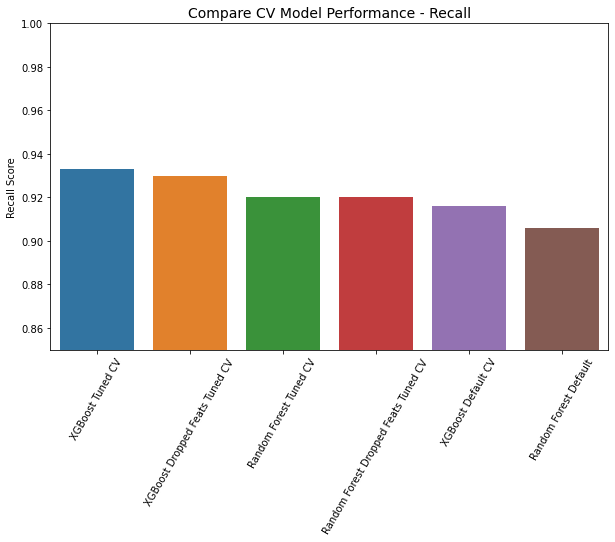

In [256]:
# plot the model performance
plt.figure(figsize=(10, 6))
sns.barplot(data=recall, x='model', y='recall')
plt.title('Compare CV Model Performance - Recall', fontsize=14)
plt.xticks(rotation=60)
plt.xlabel('')
plt.ylabel('Recall Score')
plt.ylim(0.85, 1.0)
plt.show()

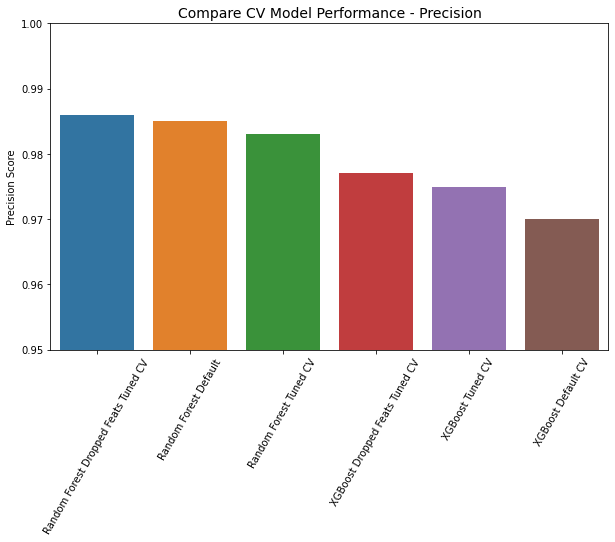

In [257]:
# plot the model performance
plt.figure(figsize=(10, 6))
sns.barplot(data=precision, x='model', y='precision')
plt.title('Compare CV Model Performance - Precision', fontsize=14)
plt.xticks(rotation=60)
plt.xlabel('')
plt.ylabel('Precision Score')
plt.ylim(0.95, 1.0)
plt.show()

## Save the Best Model



In [258]:
# pickle the xgboost model
pickle.dump(xgb_best, open('best_model.pkl', 'wb'))

## View the Employees Incorrectly Labeled

In [259]:
best_model.n_features_in_

22

In [260]:
print(classification_report(final_y_test, y_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2500
           1       0.97      0.93      0.95       498

    accuracy                           0.98      2998
   macro avg       0.98      0.96      0.97      2998
weighted avg       0.98      0.98      0.98      2998



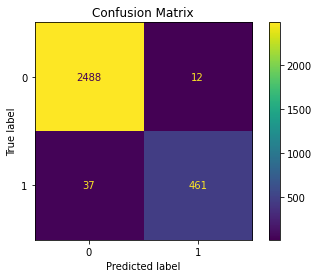

In [261]:
# load the model
best_model = pickle.load(open('best_model.pkl', 'rb'))

# predict on the test data
y_preds = best_model.predict(final_X_test)

# view the confusion matrix
cm = confusion_matrix(final_y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

### Confusion Matrix Analysis:
There are 37 False Negatives. Are these False Negatives randomly distributed? If so, there is likely nothing that can be improved upon.

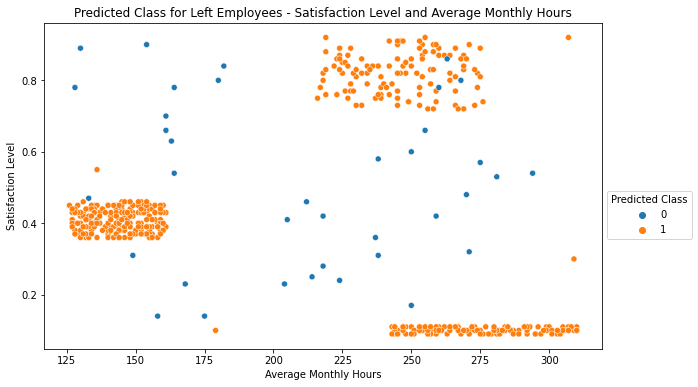

In [262]:
# create a scatter plot of the 'left' employees by satisfaction level and average monthly hours and color by predicted class
plt.figure(figsize=(10, 6))
final_X_test['left'] = final_y_test
final_X_test['predicted_class'] = y_preds
left_df = final_X_test[final_X_test['left'] == 1].copy()
sns.scatterplot(data=left_df, y='satisfaction_level', x='average_monthly_hours', hue='predicted_class')
plt.title('Predicted Class for Left Employees - Satisfaction Level and Average Monthly Hours')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')
plt.legend(loc='upper left', bbox_to_anchor= (1.0, 0.5), title='Predicted Class')
plt.show()

#### There are three False Negatives that look to be within the High Satisfaction/Medium Hours group.

What are these three characteristics? And how strong in the classification?

In [263]:
mid_sat_df = left_df[(left_df['satisfaction_level'] > 0.7)&(left_df['average_monthly_hours'] > 215)&(left_df['average_monthly_hours'] < 275)]
mid_sat_false_negs = mid_sat_df[mid_sat_df['predicted_class'] == 0]
mid_sat_false_negs

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,over_4yr_no_promo,over_worked_high_performer,salary_high,...,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,left,predicted_class
620,0.80,0.75,3,268,2,0,0,0,753.750000,0,...,0,0,0,0,0,1,0,0,1,0
116,0.86,0.68,5,263,2,0,0,0,1039.767442,0,...,0,0,0,0,0,0,0,1,1,0
1450,0.78,0.78,4,260,5,0,0,1,1040.000000,0,...,0,0,0,0,0,0,0,0,1,0


In [264]:
# get the positive probability for the false negatives
fn_proba_positive = xgb_best.predict_proba(mid_sat_false_negs.drop(columns=['left', 'predicted_class']))[:, 1]



In [265]:
mid_sat_false_negs['pred_prob_pos'] = fn_proba_positive.round(3)
for i, val in mid_sat_false_negs['pred_prob_pos'].items():
    print(f'User Index: {i}')
    print(f'Predicted Probability of Leaving: {round(val*100, 1)}%\n')

User Index: 620
Predicted Probability of Leaving: 0.0%

User Index: 116
Predicted Probability of Leaving: 0.0%

User Index: 1450
Predicted Probability of Leaving: 25.4%



#### The model is Very Confident for two of the False Negatives but one is only moderately confident

### SHAP Values

In [266]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(xgb_best)

data_for_prediction = mid_sat_false_negs.drop(columns=['left', 'predicted_class', 'pred_prob_pos'])

# start with the one with the highest probability of leaving
employee_1450 = data_for_prediction.loc[1450, :]
employee_620 = data_for_prediction.loc[620, :]
employee_116 = data_for_prediction.loc[116, :]

In [267]:
# start with the employee with the highest probability of leaving
data_for_prediction_array = employee_1450.values.reshape(1, -1)

# Calculate Shap values 
shap_values = explainer.shap_values(data_for_prediction_array)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, employee_1450)

#### The Employee 1450 looks to have pushed over the threshold by the Last Evaluation score being strongly weigthed. This feature can be explored for removal. 

In [268]:
# start with the employee with the highest probability of leaving
data_for_prediction_array = employee_620.values.reshape(1, -1)

# Calculate Shap values 
shap_values = explainer.shap_values(data_for_prediction_array)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, employee_620)

In [269]:
# start with the employee with the highest probability of leaving
data_for_prediction_array = employee_116.values.reshape(1, -1)

# Calculate Shap values 
shap_values = explainer.shap_values(data_for_prediction_array)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, employee_116)

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## My Analysis:
1. The model is quite effective at predicting Employee Churn. The highest Recall model is used since it is more costly to lose an employee by falsely assigning them as not likely to leave. With Recall score of 93% and a F1 score of 95%, this model is balanced and has very few False Negatives (predicting employees will stay when they actually leave).

2. Based on the model and this Data Analysis, these are the recommendations:
    - Look at the employees who are in the Low Satisfaction High Performer group and who are classified as likely to leave. Offer them either a promotion or a reduction in hours/projects, or perhaps both. See what they prefer.
    - For the High Satisfaction Mid Performer group who are classified likely to leave, they likely are due for a promotion, which could keep them at the company longer. Since they are mid performers they add value to the company and should be retained.
    - For the Mid Satisfaction Low Performer group who are classified likely to leave, they can take on some of the workload from the High Performer group. This may increase their satisfaction, since they may be bored with the low level of projects they have. As well, this will give them a chance to improve their evaluation score with their manager. If they still choose to leave, it is not as much of a loss to the company since they are not providing a lot of value (low # of projects, low hours)

3. See above.

4. The model could possibly be improved by doing more feature selection and feature engineering, but overall the False Negatives are fairly randomly distributed and the main patterns are learned. 
    - I would recommend trying the model without the last evaluation feature. 
    - As well, exploring more combined feature for feature interactions might improve some.

5. Using the SHAP values, the model can be used to determine what is likely to be the main driver for an individual wanting to leave. That specific item can be discussed and improved for the individual employee. This provides great individualization of HR policy for Retention.

6. All resources are at the beginning of the notebook.

7. One ethical consideration is that if an individualized policy is generated then it may not be seen as fair. Also, department data may lead to certain types of workers being treated differently. For instance, if a particular department tends to be mostly of one gender, then the geneder data could influence the model indirectly. On the other hand, there is no direct employee info that would be related to a protected class, i.e. gender, race, ethinicity. 

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results



### Conclusion, Recommendations, Next Steps

- The model has an accuracy of 98% for classifying Employee Churn.

- The model is fairly balanced in its predictions despite an imbalanced proportion of employees who leave.

- 93% of the time, the model will correctly predict the employees who will leave.

- There are three main groups of employees who are likely to leave:
    - 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.